<hr/>

# Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 2: Dynamic Programming </font></h1>





##  Content
1. Problem statement
0. Dynamic Programming algorithm


In [ ]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Populating the interactive namespace from numpy and matplotlib


## Problem Statement [P 29, Ch 1.3, Bertsekas]

#### A driver is looking for inexpensive parking on the way to his destination. The parking area contains $N$ spaces, and a garage at the end. The driver starts at space 0 and traverses the parking spaces sequentially, i.e., from space $k$ he goes next to space $k+1$, etc. Each parking space $k$ costs $c(k)$ and is free (unoccupied) with probability $p(k)$ independently of whether other parking spaces are free or not. If the driver reaches the last parking space and does not park there, he must park at the garage, which costs $C$. The driver can observe whether a parking space is free only when he reaches it, and then, if it is free, he makes a decision to park in that space or not to park and check the next space. The problem is to find the minimum expected cost parking policy.

In [ ]:
# write any global function here if needed

#Define a function to get list of optimal expected cost-to-go from list of parking cost
def get_list_optimal_expected_cost(list_c):
  #Initialize an array reflects the expexted cost-to-go
  list_expected_cost = np.ones(N) * np.Inf
  #Initialize back-tracking array for DP
  list_V = np.ones(N) * np.Inf
  #Run DP
  k = N-1
  list_V[k] = p_k * min(list_c[k], C) + (1 - p_k) * C
  for k in range(N - 2, -1, -1):
    list_V[k] = p_k * min(list_c[k], list_V[k+1]) + (1 - p_k) * list_V[k+1]
  #Update the optimal expexted cost-to-go array
  for k in range(len(list_expected_cost)):
    list_expected_cost[k] = list_V[k]
  return list_expected_cost

#Define a function to get list of optimal action from list of optimal expected cost-to-go
def get_list_optimal_action(list_expected_cost):
  #Initialize a binary matrix, where 0 means don't park, 1 mean park if possible
  list_actions = np.zeros(N)
  for k in range(len(list_expected_cost)):
    if k == N-1 and list_expected_cost[k] < C:
      list_actions[k] = 1
    elif k < N-1 and list_expected_cost[k] < list_expected_cost[k+1]:
      list_actions[k] = 1
  return list_actions

#Initialize global variables
N, C, p_k = 200, 100, 0.05

## Problem 1.  Dynamic Programming (DP) algorithm

1. (30 pts) Assume $N=200$, $C=100$; $p(k)\equiv0.05$ and $c(k)=N-k$ for all $k\in[0,N-1]$, please:
<br>   (a) Implement the Dynamic Programming algorithm to generate the expected cost-to-go upon arriving at each space $k$, if we always park at the first available space;
<br>   (b) Implement the Dynamic Programming algorithm to generate the optimal expected cost-to-go upon arriving at each space $k$;
<br>   (c) Plot and compare (a) and (b).
<br>   (d) Plot the optimal action to do at each space $k$.


2. (10 pts) You now have the freedom to change $C$, $p(k)$ and $c(k)$. Please come up with different parameters such that:
<br>   (a) parking at the first available space is the optimal policy;
<br>   (b) not parking until reach the garage is the optimal policy.

      and plot optimal expected cost-to-go upon arriving at each space k repectively.


### 1.a

In [ ]:
#Define a function to return an array refects the parking cost
def sample_parking_costs(N):
  list_c = np.zeros(N)
  for k in range(N):
    list_c[k] = N - k
  return list_c

list_c = sample_parking_costs(N)

#Initialize an array reflects the expexted cost-to-go
list_expected_cost_1a = np.ones(N) * np.Inf
#Initialize back-tracking array for DP
list_V = np.ones(N) * np.Inf

#Run DP if always park at the 1st place
k = N-1
list_V[k] = p_k * list_c[k] + (1 - p_k) * C
for k in range(N - 2, -1, -1):
  list_V[k] = p_k * list_c[k] + (1 - p_k) * list_V[k+1]

#Update expexted cost-to-go array
for k in range(len(list_expected_cost_1a)):
  list_expected_cost_1a[k] = list_V[k]

### 1.b

In [ ]:
list_expected_cost_1b = get_list_optimal_expected_cost(list_c)

### 1.c

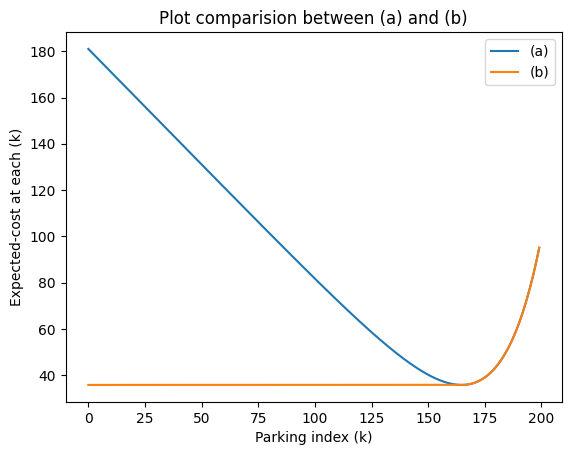

In [ ]:
fig = plt.figure()
list_parking_index = np.arange(0, N)

plt.plot(list_parking_index, list_expected_cost_1a)
plt.plot(list_parking_index, list_expected_cost_1b)

plt.legend(["(a)", "(b)"])

plt.xlabel("Parking index (k)")
plt.ylabel("Expected-cost at each (k)")
plt.title("Plot comparision between (a) and (b)")
plt.show()

### 1.d

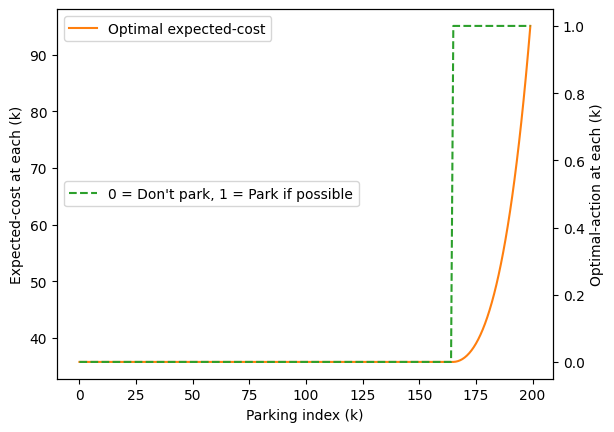

In [ ]:
list_actions = get_list_optimal_action(list_expected_cost_1b)

plt.plot(list_parking_index, list_expected_cost_1b, color = "#ff7f0e")
plt.xlabel("Parking index (k)")
plt.ylabel("Expected-cost at each (k)")
plt.legend(["Optimal expected-cost"], loc = 0)

plt.twinx()
plt.plot(list_parking_index, list_actions, '--', color = "#2ca02c")
plt.ylabel("Optimal-action at each (k)")
plt.legend(["0 = Don't park, 1 = Park if possible"], loc = 6)
plt.show()

### 2.a

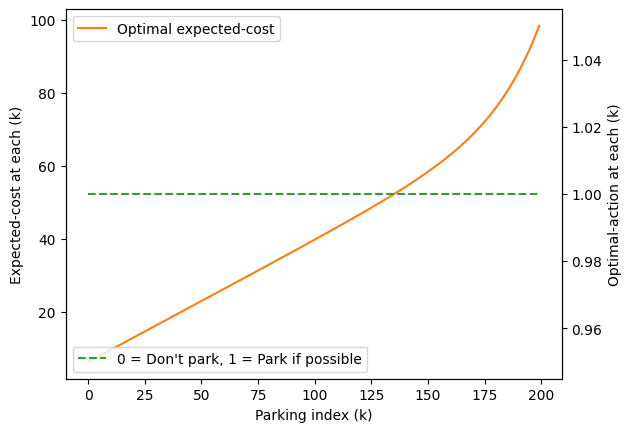

In [ ]:
#Define a function to return an array refects the parking cost
def sample_parking_costs_2a(N):
  list_c = np.zeros(N)
  for k in range(N):
    # Change c(k) s.t. the parking cost is stricly monotonic increasing and always smaller than C
    list_c[k] = k/3
  return list_c

list_expected_cost_2a = get_list_optimal_expected_cost(sample_parking_costs_2a(N))
list_actions_2_a = get_list_optimal_action(list_expected_cost_2a)

plt.plot(list_parking_index, list_expected_cost_2a, color = "#ff7f0e")
plt.xlabel("Parking index (k)")
plt.ylabel("Expected-cost at each (k)")
plt.legend(["Optimal expected-cost"], loc = 0)

plt.twinx()
plt.plot(list_parking_index, list_actions_2_a, '--', color = "#2ca02c")
plt.ylabel("Optimal-action at each (k)")
plt.legend(["0 = Don't park, 1 = Park if possible"], loc = 3)
plt.show()

### 2.b

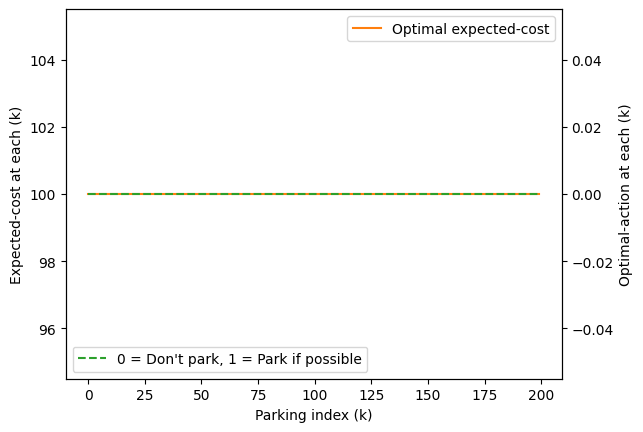

In [ ]:
#Define a function to return an array refects the parking cost
def sample_parking_costs_2b(N):
  list_c = np.zeros(N)
  for k in range(N):
    #Change c(k) s.t. the parking cost is always smaller than C
    list_c[k] = N - k + 2 * C
  return list_c

list_expected_cost_2b = get_list_optimal_expected_cost(sample_parking_costs_2b(N))
list_actions_2_b = get_list_optimal_action(list_expected_cost_2b)

plt.plot(list_parking_index, list_expected_cost_2b, color = "#ff7f0e")
plt.xlabel("Parking index (k)")
plt.ylabel("Expected-cost at each (k)")
plt.legend(["Optimal expected-cost"], loc = 0)

plt.twinx()
plt.plot(list_parking_index, list_actions_2_b, '--', color = "#2ca02c")
plt.ylabel("Optimal-action at each (k)")
plt.legend(["0 = Don't park, 1 = Park if possible"], loc = 3)
plt.show()

In [9]:
!pip install nbconvert
!jupyter nbconvert --to pdf --output /content/problem2.pdf problem2.ipynb

[NbConvertApp] WARNING | pattern 'problem2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Ex